# Customer Churn (LSTM) 

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv(r'C:\Users\Windows\Downloads\cchurn.csv')

# EDA 

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df=df[['tenure','MonthlyCharges','TotalCharges','Churn']] 

In [6]:
df.head()

,tenure,MonthlyCharges,TotalCharges,Churn
0,1,29.85,29.85,No
1,34,56.95,1889.5,No
2,2,53.85,108.15,Yes
3,45,42.30,1840.75,No
4,2,70.70,151.65,Yes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          7043 non-null   int64  
 1   MonthlyCharges  7043 non-null   float64
 2   TotalCharges    7043 non-null   object 
 3   Churn           7043 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 220.2+ KB


In [8]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'], errors='coerce')

In [9]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
df['Churn']=le.fit_transform(df['Churn'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          7043 non-null   int64  
 1   MonthlyCharges  7043 non-null   float64
 2   TotalCharges    7032 non-null   float64
 3   Churn           7043 non-null   int32  
dtypes: float64(2), int32(1), int64(1)
memory usage: 192.7 KB


In [11]:
df.isnull().sum().sort_values(ascending = False)

TotalCharges      11
tenure             0
MonthlyCharges     0
Churn              0
dtype: int64

In [12]:
df=df.dropna()

<Axes: xlabel='Churn', ylabel='count'>

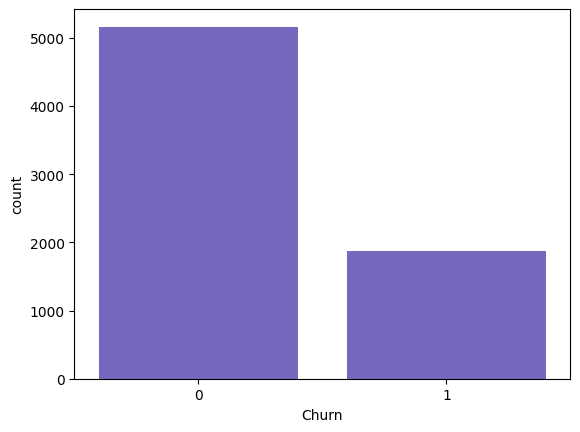

In [13]:
sns.countplot(x='Churn',data=df,color='SlateBlue')

# Preprocessing

In [14]:
scaler = MinMaxScaler()
df[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df[['tenure', 'MonthlyCharges', 'TotalCharges']])

In [15]:
x = df.drop(columns=['Churn'])
y = df['Churn']

In [16]:
# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Reshaping Data for LSTM

In [17]:
x_train = np.reshape(x_train.values, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test.values, (x_test.shape[0], 1, x_test.shape[1]))

# Building and Training the LSTM Model

In [18]:
model = Sequential()

# Step 2: Adding LSTM layer
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.2))

# Step 3: Adding a second LSTM layer
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Step 4: Add the output layer (binary classification)
model.add(Dense(units=1, activation='sigmoid'))

# Step 5: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 6: Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

C:\Users\Windows\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.7140 - loss: 0.6237 - val_accuracy: 0.7342 - val_loss: 0.5155
Epoch 2/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7432 - loss: 0.5027 - val_accuracy: 0.7854 - val_loss: 0.4713
Epoch 3/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7821 - loss: 0.4778 - val_accuracy: 0.7804 - val_loss: 0.4681
Epoch 4/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7907 - loss: 0.4541 - val_accuracy: 0.7811 - val_loss: 0.4656
Epoch 5/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7859 - loss: 0.4499 - val_accuracy: 0.7825 - val_loss: 0.4663
Epoch 6/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7925 - loss: 0.4419 - val_accuracy: 0.7832 - val_loss: 0.4655
Epoch 7/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7787 - loss: 0.4620 - val_accuracy: 0.7875 - val_loss: 0.4665
Epoch 8/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7855 - loss: 0.4505 - val_accuracy: 

 # Evaluating the Model

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7886 - loss: 0.4591
Test Accuracy: 78.39%


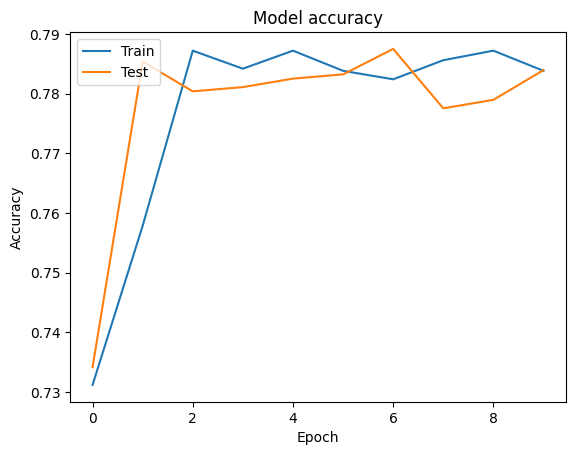

In [19]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Plot training & validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Let's see the model 

In [20]:
input_yes = np.array([[1, 100, 100]])  # tenure = 1 month, MonthlyCharges = 100, TotalCharges = 100
input_yes = input_yes.reshape(1, 1, 3)  # Reshaping for LSTM input

In [21]:
input_no = np.array([[60, 50, 3000]])  # tenure = 60 months, MonthlyCharges = 50, TotalCharges = 3000
input_no = input_no.reshape(1, 1, 3)  # Reshaping for LSTM input

In [22]:
prediction_yes = model.predict(input_yes)
print(f"Churn Prediction (Yes): {prediction_yes[0][0]:.2f}")


prediction_no = model.predict(input_no)
print(f"Churn Prediction (No): {prediction_no[0][0]:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 706ms/step
Churn Prediction (Yes): 0.93
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Churn Prediction (No): 0.82


Good to see it's working ! 

# Thank You !!!🌟